## Quantum Fourier Transform using Qibo

In this notebook, the implementation of the quantum fourier transform circuit using Qibo, an open source framework for programming quantum computers.

In this case, we need to import the following libraries. Especifically we need to import the different objects that we are going to use from Qibo and math, the python library.

In [ ]:
from qibo import gates
from qibo.models.circuit import Circuit
import math

Once we have the needed imports, we are going to define the number of qubits that will have the circuit. You can change the number to see different sizes of the QFT circuit.

In [ ]:
# number of qubits in the QFT circuit
nqubits = ...

At this point we can start building our circuit. The first part is to declare an empty circuit with the number of qubits that we have defined previously.

In [ ]:
# Circuit is the object in Qibo that represents the circuit that is going to be build
#The circuit is declared with nqubits qubits
circuit = Circuit(nqubits)

In the following cell we are going to add the gates we need in order to build the QFT circuit. The circuit should represent the following expression:

$$ F_{N}| k\rangle = \bigotimes_{l=1}^{n} \frac{1}{\sqrt{2}} (| 0\rangle + e^{i2\pi k/2^{l}}| 1\rangle) $$

As we can see, this a tensor product of $n$ qubits (in this case, $nqubits$ qubits). These qubits are in a superposition. This superposition can be achieved applying a the Hadamard gate.

However if we take a look at the amplitude of $| 1\rangle$. In order to achieve it in this circuit, we are going to use the U1 gate from Qibo. This gate is represented by the following matrix operator:
$$\begin{pmatrix}
1 & 0\\
0 & e^{i\theta}
\end{pmatrix}$$

In this case $\theta = 2\pi k/2^{l}$ and $k/2^{l}$ can be expressed as the fraction of a power of 2. It can be useful to use another notation. For instance $k/2^{l} = 0.k_1k_2...k_l$ where $k_n$ is the  $n^{th}$ qubit and $l$ is the the number of qubits we have treated. So we will apply $n$ controlled-U1 to the $l$ qubit being controlled by the $n^{th}$ qubit.

Giving an example, the following circuit is the example of the QFT of 3 qubits.
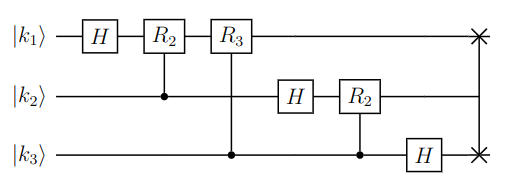

In [ ]:
# a Hadamard gate is applied to each qubit.
# then a CU1 gate is applied to every qubit from the qubit q+1 to the nqubits-1 qubit (last qubit).
for q1 in range(nqubits):
    circuit.add(gates.H(q1))
    for q2 in range(q1 + 1, nqubits):
        theta = math.pi / 2 ** (q2 - q1)
        circuit.add(gates.CU1(q2, q1, theta))

However, although we applied the correct gates to each qubit. Our circuit now is upside down. In order to fix this we will apply SWAP gates to each pair of qubits (the first qubit and the last qubit, the second qubit and the penultimate qubit. This what we are going to do in the following code cell.

In [ ]:
# Finally the SWAP gates are added
for i in range(nqubits // 2):
    circuit.add(gates.SWAP(i, nqubits - i - 1))

Now we have our Quantum Fourier Transform quantum circuit using qibo with $nqubits$ qubits. This circuit is transforming the state $| 0\rangle$ to its Fourier basis. In case you want to transform another state, you can add X gates to the desired qubits at the beginning of the circuit to represent the any integer in its binary form.

The following cell will give you a markdown that draws our final circuit.

In [ ]:
print(circuit.draw())